##***Loan Repayment Assessment in Banking.***

In [ ]:
# Statistics descriptive analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
# Data preprocessing
from sklearn.ensemble import IsolationForest     # remove outlier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer       #treat missing value
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
# Feature selection
from sklearn.feature_selection import SelectFromModel
# Model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
# Ensemble techniques - Bagging, Boosting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Cross validation
from sklearn.model_selection import cross_val_score

# Grid search, Tuning Hyper parameters
from sklearn.model_selection import GridSearchCV

# Evaluation metric: F1 - Score
from sklearn.metrics import f1_score

##1-DATA IMPORT

In [ ]:
#load data
train_data = pd.read_csv('/content/train_loan_data (1).csv')
train_data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [ ]:
#shape of train data set for check any considerable data loss
train_data.shape

(80000, 28)

In [ ]:
train_data['loan_status'].value_counts()

loan_status
Paid         64030
Defaulted    15970
Name: count, dtype: int64

##2- PREPROCESSING DATA(HANDLE MISSING VALUE):-
-Have you prepared the data for analysis through necessary transformations?

In [ ]:
#check if any missing value
# Check missing values in training and validation sets
print("Missing values in training set:")
print(train_data.isnull().sum())

Missing values in training set:
addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64


In [ ]:
#treat the missing value imputation method (fill the missing value using mean)
# For numerical columns, fill missing values with mean(imputation)
numerical_columns =train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numerical_columns] =train_data[numerical_columns].fillna(train_data[numerical_columns].mean())

# For categorical columns, fill missing values with mode
categorical_columns =train_data.select_dtypes(include=['object']).columns
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])

In [ ]:
#check after treating missing value if any
print("Missing values in training  after treating set:")
print(train_data.isnull().sum())

Missing values in training  after treating set:
addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64


In [ ]:
#shape of data after treating the missing value
train_data.shape

(80000, 28)

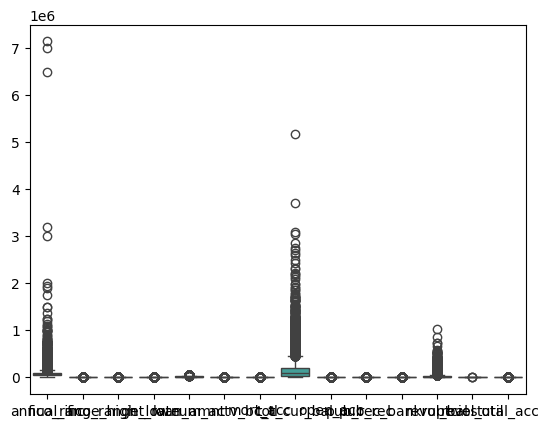

In [ ]:
# Create a box plot using Seaborn
sns.boxplot(data=train_data)
# Display the plot
plt.show()

#remove outlier

In [ ]:
from sklearn.ensemble import IsolationForest
# Select only numerical columns for outlier detection
numeric_train_data = train_data.select_dtypes(include=[np.number])

# Remove Outliers
outlier_detector = IsolationForest(contamination=0.1, random_state=42)
outliers = outlier_detector.fit_predict(numeric_train_data)
df_no_outliers = train_data[outliers == 1]

# Handle Data Inconsistencies
# Remove duplicate records
train_data = df_no_outliers.drop_duplicates()

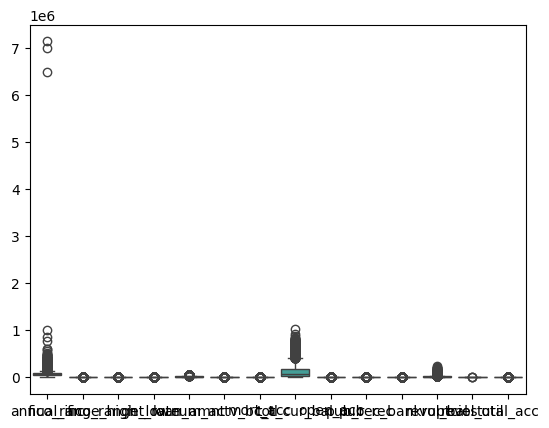

In [ ]:
# Create a box plot using Seaborn
sns.boxplot(data=train_data)
# Display the plot
plt.show()

In [ ]:
train_data.shape

(72000, 28)

In [ ]:
train_data['loan_status']

0        Defaulted
1             Paid
2             Paid
3             Paid
5             Paid
           ...    
79994         Paid
79995    Defaulted
79996         Paid
79997         Paid
79998         Paid
Name: loan_status, Length: 72000, dtype: object

#Data ***Transformation***

In [ ]:
# Get the list of categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: ['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'application_type', 'initial_list_status', 'purpose', 'sub_grade', 'term', 'title', 'verification_status', 'loan_status']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
# Fit and transform the categorical columns
encoded=ohe.fit_transform(train_data[categorical_columns])
encoded.shape

(72000, 39716)

#spliting data into X and y

In [ ]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target variable (y)
X =train_data.drop(columns=['loan_status'])
y =train_data['loan_status']

# Split the data into training and validation sets (adjust test_size and random_state as needed)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and   validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("validation set shape:", X_val.shape, y_val.shape)

Training set shape: (57600, 27) (57600,)
validation set shape: (14400, 27) (14400,)


##3:-Exploratory Data Analysis (EDA)
-Have you explored the data with summary statistics and visualizations?\
-Did you uncover and explain data patterns, trends, and insights?

In [ ]:
# Summary Statistics
print("Summary Statistics:")
print(train_data.describe())

Summary Statistics:
         annual_inc  fico_range_high  fico_range_low      int_rate  \
count  7.200000e+04     72000.000000    72000.000000  72000.000000   
mean   7.000003e+04       696.928333      692.928333     13.335288   
std    5.716127e+04        27.026420       27.026420      4.616836   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.500000e+04       674.000000      670.000000      9.990000   
50%    6.200000e+04       689.000000      685.000000     12.880000   
75%    8.500000e+04       714.000000      710.000000     16.020000   
max    7.141778e+06       809.000000      805.000000     30.990000   

          loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  72000.000000    72000.000000  72000.000000  7.200000e+04  72000.000000   
mean   13826.514583        3.541464      1.519335  1.244919e+05     11.168819   
std     8197.662886        1.985066      1.791596  1.204268e+05      4.854111   
min      750.000000      

In [ ]:
# Check the distribution of categorical variables
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(train_data[col].value_counts())

addr_state
CA    10433
TX     5910
NY     5841
FL     5101
IL     2708
NJ     2494
PA     2432
OH     2350
GA     2257
NC     2091
VA     1953
MI     1897
AZ     1791
MA     1649
CO     1600
WA     1579
MD     1555
MN     1283
IN     1199
MO     1185
NV     1118
TN     1094
CT      994
WI      945
OR      924
SC      921
AL      898
LA      858
KY      774
OK      668
KS      597
AR      541
UT      495
NM      415
HI      379
MS      351
NH      337
RI      325
WV      245
NE      224
MT      219
DE      196
AK      194
DC      184
SD      182
WY      172
VT      171
ME       96
ID       93
ND       81
IA        1
Name: count, dtype: int64
earliest_cr_line
Sep-03    510
Aug-03    504
Sep-04    503
Aug-01    501
Oct-01    501
         ... 
Apr-67      1
May-59      1
May-68      1
Nov-61      1
Jan-59      1
Name: count, Length: 633, dtype: int64
emp_length
10+ years    27287
2 years       6619
3 years       5891
< 1 year      5733
1 year        4852
5 years       4624
4 years       43

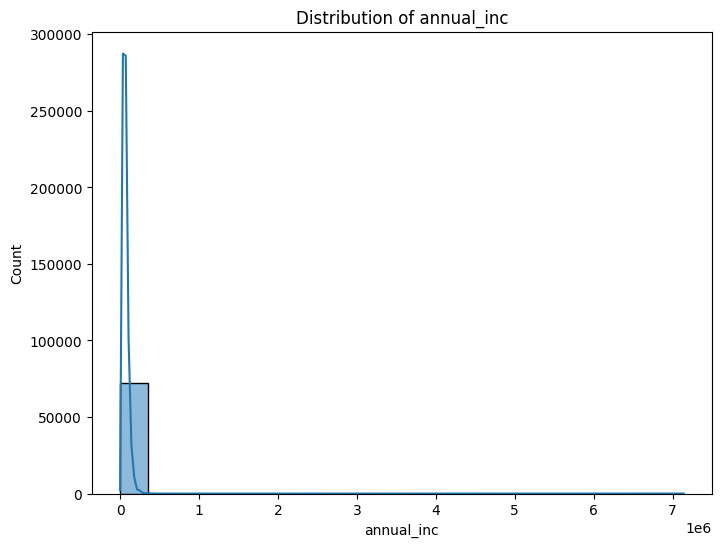

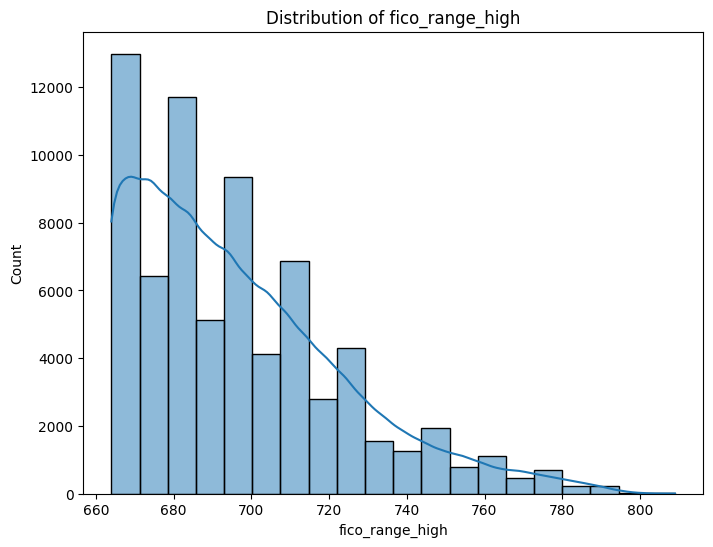

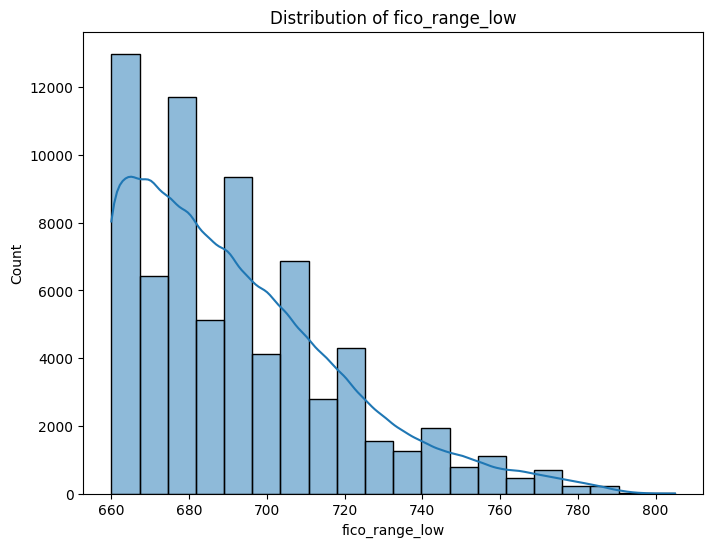

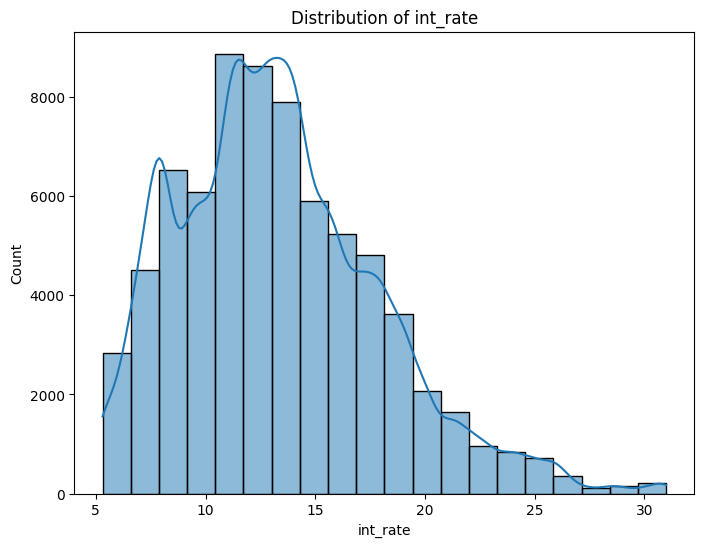

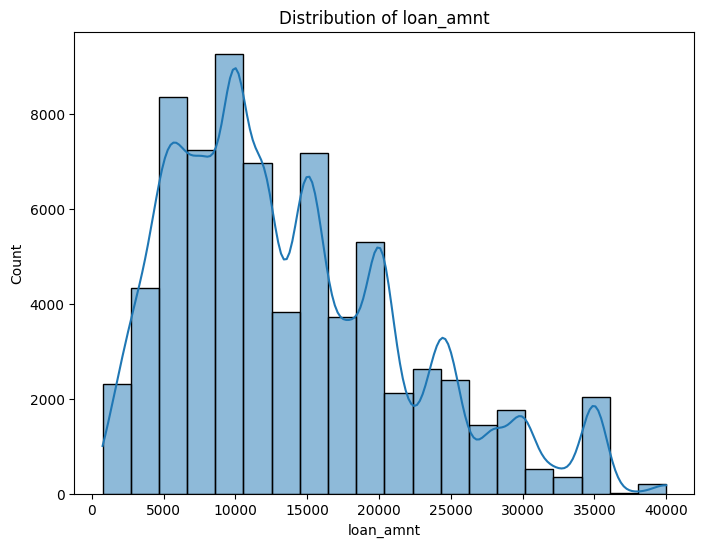

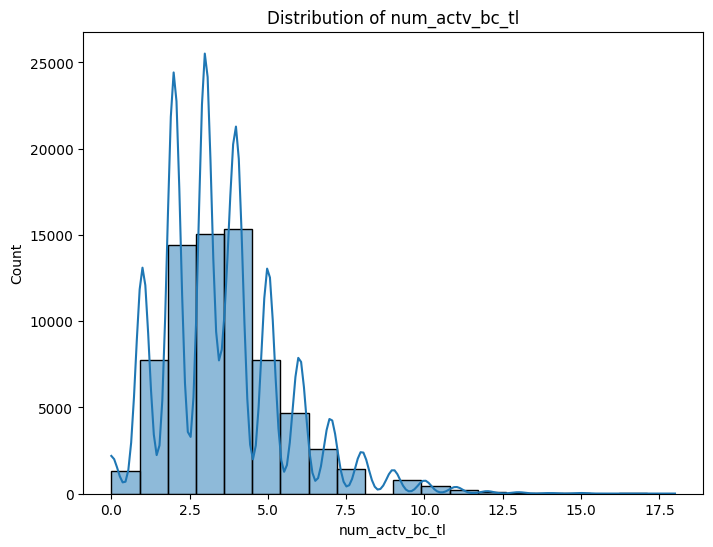

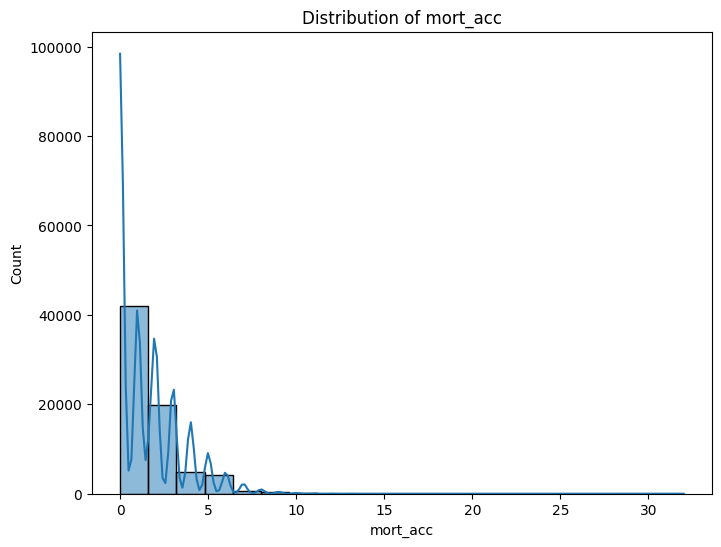

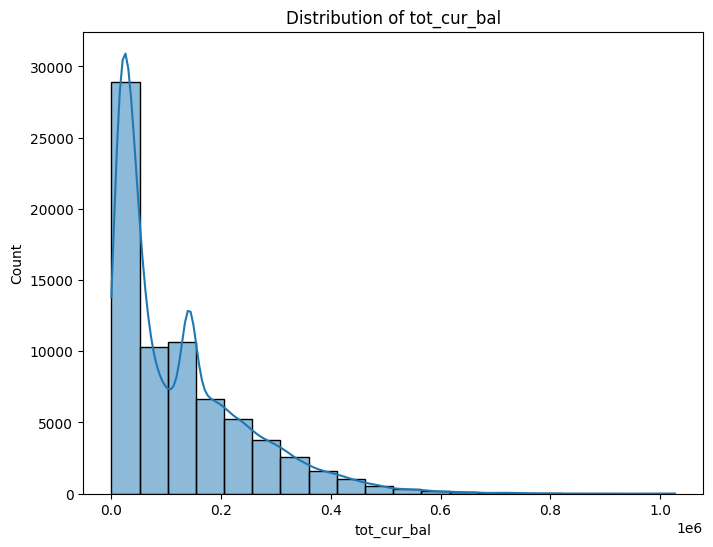

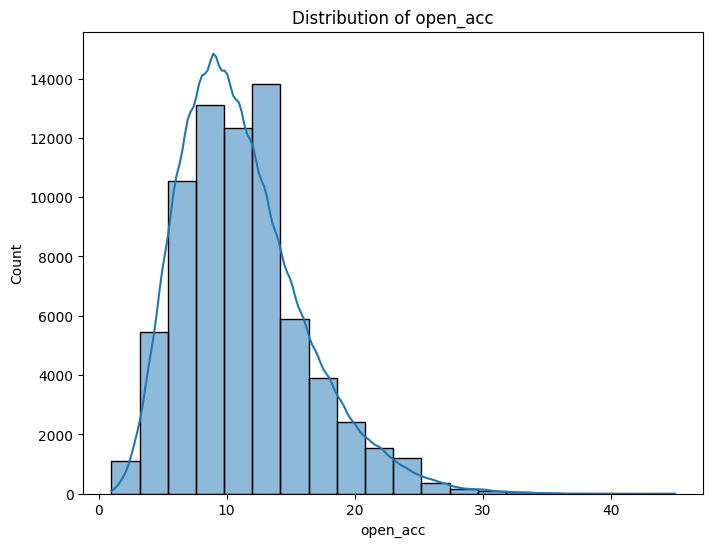

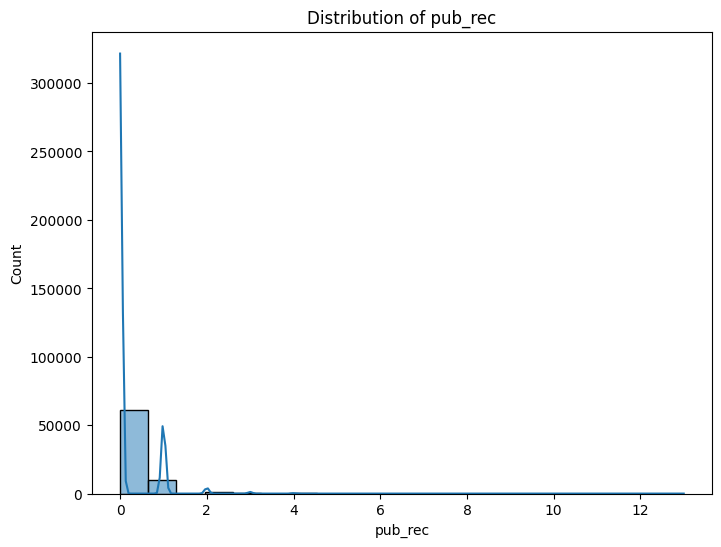

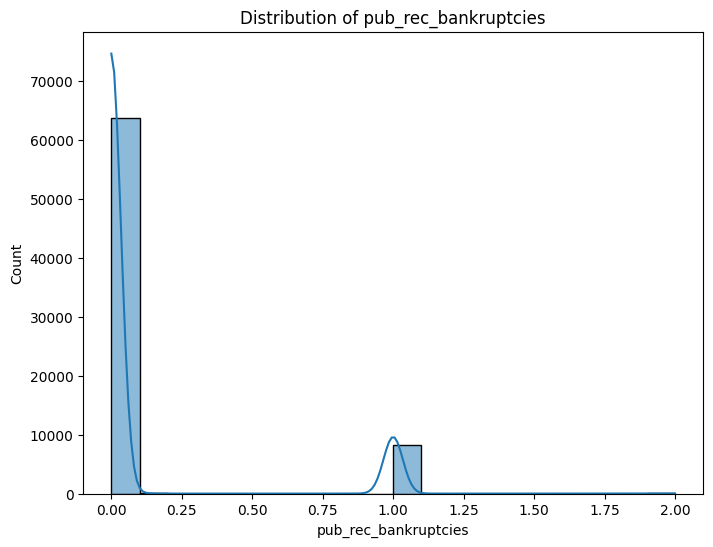

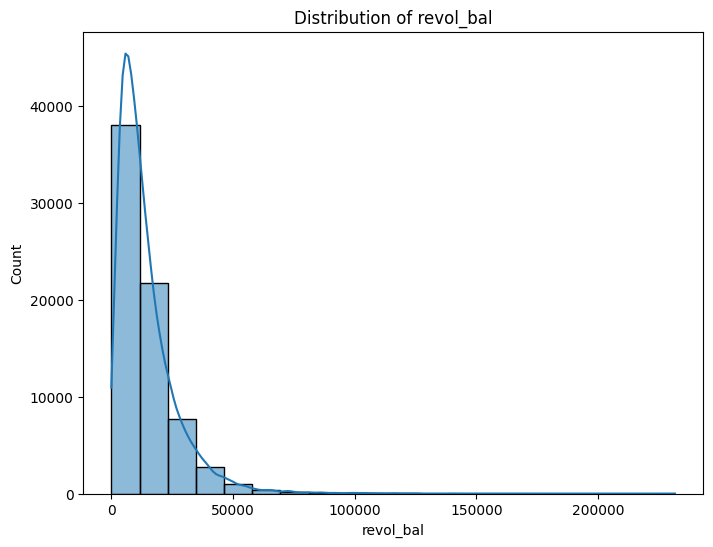

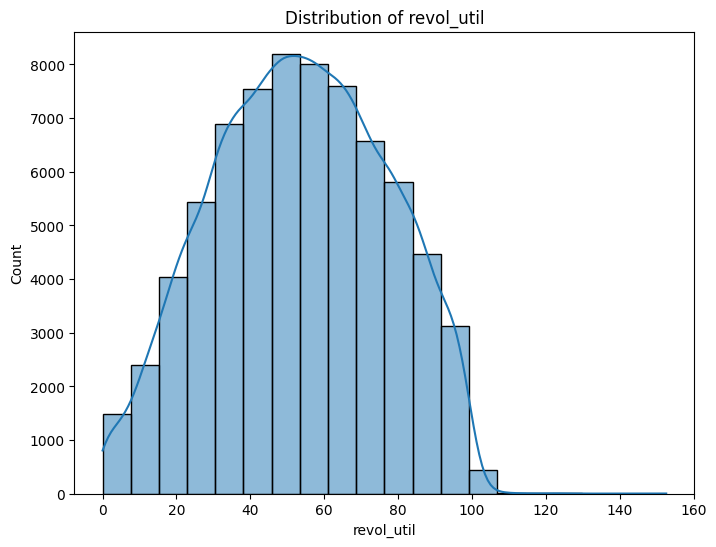

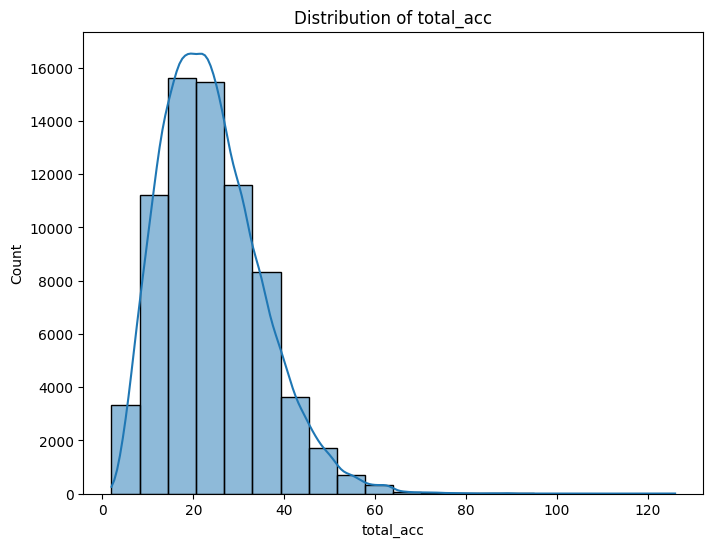

In [ ]:
# Visualizations

# Distribution of loan_status
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()